### Temperature forecasting with Exponential Smoothing

In [10]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
# importing dataset

df = pd.read_csv('DailyDelhiClimateTest.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [12]:
df = df.asfreq('D')
df.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-22',
               '2017-04-23', '2017-04-24'],
              dtype='datetime64[ns]', name='date', length=114, freq='D')

In [13]:
df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [16]:
# model building

model  = ExponentialSmoothing(endog=df['meantemp'])
fitted_model = model.fit()

In [17]:
# predictions 

predictions = fitted_model.forecast(steps = 31)

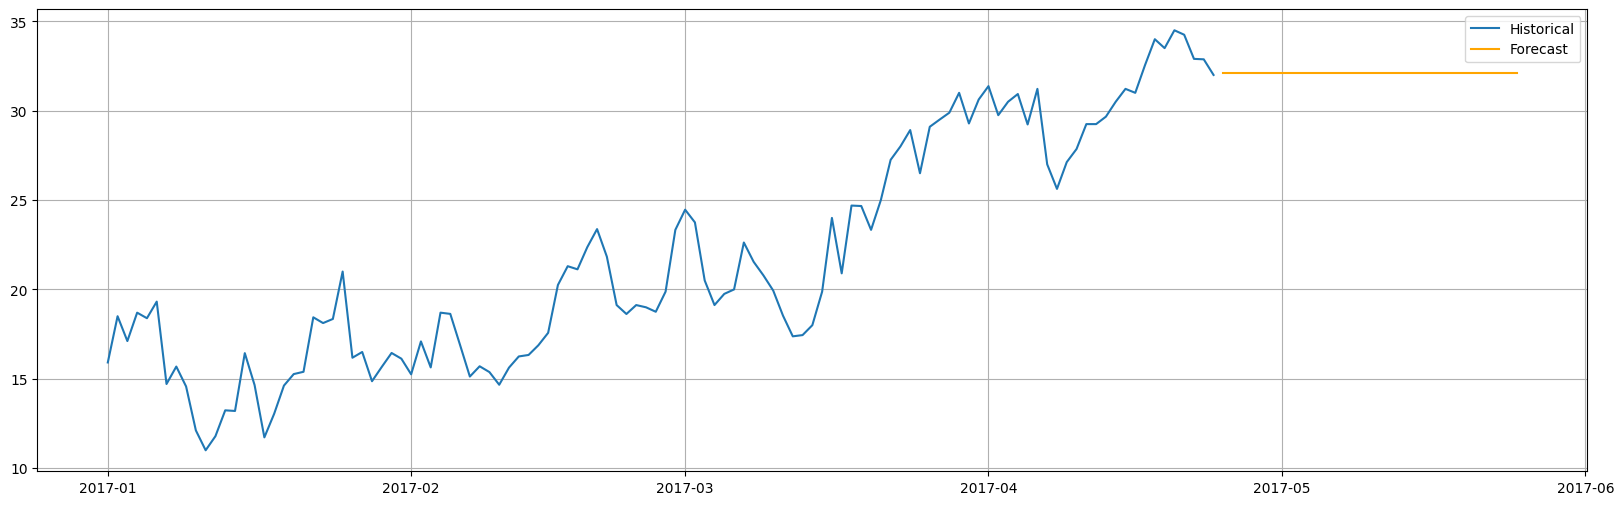

In [20]:
#plotting

plt.figure(figsize=(20,6))
plt.plot(df['meantemp'], label='Historical')
plt.plot(predictions, label='Forecast', color='orange')
plt.legend()
plt.grid()
plt.show()